In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [ ]:
df = df[df['job_title_short'] == 'Data Analyst']

In [ ]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') 
)

skills_stats = skill_stats.sort_values(by='skill_count', ascending = False).head(10)


In [ ]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Job Count for Top 10 Skills')
plt.xlabel('Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

## Practice Problems

## Median Yearly Salary vs. Job Count
1. Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
2. To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
3. Annotate each point with the job title name.

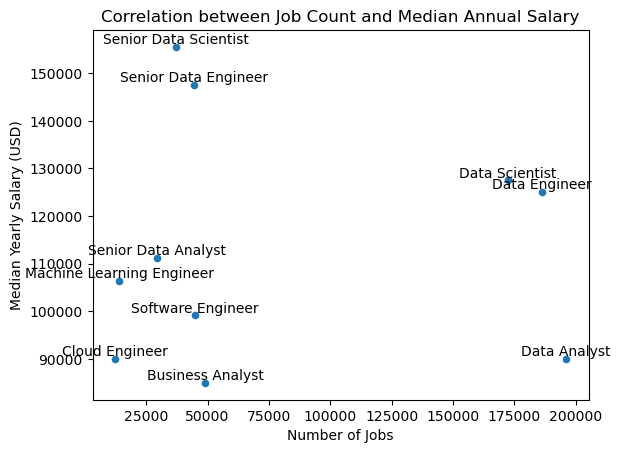

In [ ]:
title_salary_stats = df.groupby('job_title_short').agg(
 median_salary_avg=('salary_year_avg', 'median'),
 job_count=('job_title_short', 'count')
).dropna()

title_salary_stats.plot(kind='scatter', x='job_count', y='median_salary_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Correlation between Job Count and Median Annual Salary')

for i in range(len(title_salary_stats)):
   job_count = title_salary_stats['job_count'].iloc[i]
   mean_salary = title_salary_stats['median_salary_avg'].iloc[i]
   job_title = title_salary_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

## Top 7 Countries by Median Yearly Salary vs Job Count
Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

In [30]:
count_salary = df.groupby('job_country').agg(
    posting_counts=('job_country', 'count'),
    median_salary_count=('salary_year_avg', 'median')
).dropna()

top_7_counts = count_salary.sort_values(by='posting_counts', ascending=False).head(7)
top_7_counts

,posting_counts,median_salary_count
job_country,,
United States,206292,119187.5
India,51088,111175.0
United Kingdom,40375,104668.0
France,39922,97444.0
Germany,27694,111175.0
Spain,25100,98391.5
Singapore,23696,100500.0


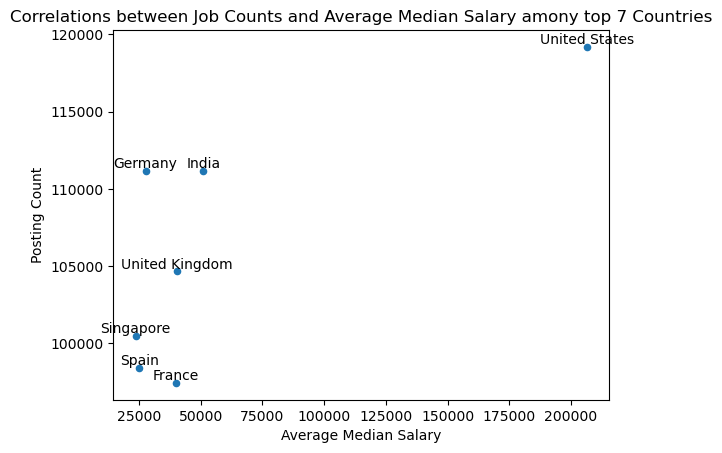

In [36]:
top_7_counts.plot(kind='scatter', x='posting_counts', y='median_salary_count')
plt.title('Correlations between Job Counts and Average Median Salary amony top 7 Countries')
plt.xlabel('Average Median Salary')
plt.ylabel('Posting Count')

for i in range(len(top_7_counts)):
 job_count = top_7_counts['posting_counts'].iloc[i]
 mean_salary = top_7_counts['median_salary_count'].iloc[i]
 country = top_7_counts.index[i]
 plt.text(job_count, mean_salary, country, ha='center', va='bottom')


### Average Yearly Salary vs. Job Count for Top Roles by Schedule Type
1. Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
  - Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
  - United States for the job_country
  - 'Full-time' and 'Contractor' for the job_schedule_type
  - Remove roles that do not have any yearly salary data.
2. Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
3. For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
4. Ensure the legend is appearing.
5. Label the plot's axis and title appropriately.

In [51]:
job_titles_target =  ['Data Analyst', 'Data Scientist', 'Data Engineer']

us_jobs_df = df[
    (df['job_country'] == 'United States') &
    (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
    (df['job_title_short'].isin(job_titles_target))
].dropna(subset='salary_year_avg').copy()

sorted_stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_counts=('job_title_short', 'count'),
    median_salary_avg=('salary_year_avg', 'median')
).dropna()

sorted_stats.reset_index(inplace=True)
sorted_stats['job_title_type'] = sorted_stats['job_title_short'] + ' - ' + sorted_stats['job_schedule_type']

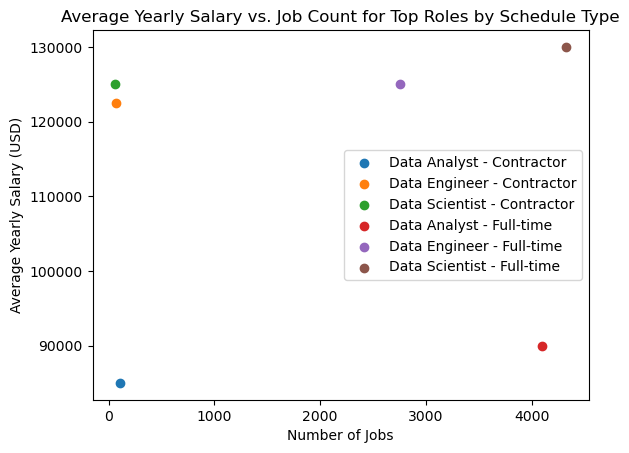

In [55]:
for job_title_type in sorted_stats['job_title_type'].unique():
    subset = sorted_stats[sorted_stats['job_title_type'] == job_title_type]
    plt.scatter(subset['job_counts'], subset['median_salary_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

### Extra Practices

### Average Yearly Salary vs. Job Count for Top Roles by Schedule Type
1. Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
  - Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
  - United States for the job_country
  - 'Full-time' and 'Contractor' for the job_schedule_type
  - Remove roles that do not have any yearly salary data.
2. Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
3. For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
4. Ensure the legend is appearing.
5. Label the plot's axis and title appropriately.

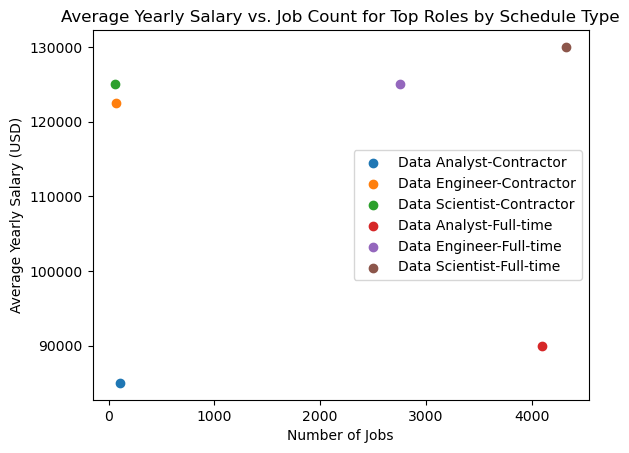

In [13]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
schedule_type = ['Full-time', 'Contractor']

us_sorted = df[
    (df['job_title_short'].isin(job_titles)) & 
    (df['job_country'] == 'United States') & 
    (df['job_schedule_type'].isin(schedule_type))
].dropna(subset=['salary_year_avg']).copy()

df_sorted = us_sorted.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_counts=('job_title_short', 'count'),
    median_salary_avg=('salary_year_avg', 'median')
).dropna()

df_sorted.reset_index(inplace=True)
df_sorted['job_title_type'] = df_sorted['job_title_short'] + '-' + df_sorted['job_schedule_type']

for title_type in df_sorted['job_title_type'].unique():
    subset = df_sorted[df_sorted['job_title_type'] == title_type]
    plt.scatter(subset['job_counts'], subset['median_salary_avg'], label=title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

